<a href="https://colab.research.google.com/github/ActiveStacks/ExpermentsThesis/blob/main/EXPERMIENT_CODELLM_2A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [61]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [62]:
df2 = pd.read_csv(path2)

In [63]:
df2.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [64]:
df2.dropna()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"
...,...,...,...,...,...,...,...,...,...
2776017,3302332,file,WARNING,Logging found,"Log.w(NotificationCenter.TAG, (Throwable)o);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(NotificationCenter.TAG, (Throwable)o);"
2776519,3302837,file,WARNING,Logging found,"Log.d((String)string2, (String)this.zzh(string...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d((String)string2, (String)this.zzh(string..."
2776785,3303105,file,WARNING,Logging found,"Log.w(""GoogleApiAvailability"", concat2);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", concat2);"
2776819,3303139,file,WARNING,Insecure functions found,public static <TResult> Task<TResult> call(fin...,CWE-676,Use of Potentially Dangerous Function,1,public static <TResult> Task<TResult> call(fin...


In [65]:
df2.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [66]:
df2.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
2776822,3303142,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,0,this.zzq = bl;
2776823,3303143,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,0,this.zzr = string2;
2776824,3303144,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,0,this.zzs = zze2;
2776825,3303145,file,INFO,Hardcoded HTTP url found,private CellResolution parseCellResolution(Xml...,CWE-312,Cleartext Storage of Sensitive Information,1,private CellResolution parseCellResolution(Xml...
2776826,3303146,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);"


In [67]:
df2.shape

(2776827, 9)

In [68]:
df2.describe()

,index,Vulnerability_status
count,2.776827e+06,2.776827e+06
mean,1.544224e+06,8.136625e-03
std,9.851107e+05,8.983553e-02
min,0.000000e+00,0.000000e+00
25%,6.942065e+05,0.000000e+00
50%,1.388413e+06,0.000000e+00
75%,2.456216e+06,0.000000e+00
max,3.303146e+06,1.000000e+00


In [69]:
df2.columns

Index(['index', 'category', 'Severity', 'Description', 'Code', 'CWE_ID',
       'CWE_Desc', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [70]:
df2.nunique()

,0
index,2776827
category,5
Severity,3
Description,26
Code,2758762
CWE_ID,14
CWE_Desc,14
Vulnerability_status,2
processed_code,2757114


In [71]:
df2['Vulnerability_status'].unique()

array([0, 1])

In [72]:
print(df2['Vulnerability_status'].value_counts())

Vulnerability_status
0    2754233
1      22594
Name: count, dtype: int64


In [73]:
df2_safe = df2[df2['Vulnerability_status']==0]

In [74]:
df2_vulnerable = df2[df2['Vulnerability_status']==1]

In [75]:
df2_safe.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package androidx.preference;,NaN,NaN,0,package androidx.preference;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.a.a.a.class_698;,NaN,NaN,0,import a.a.a.a.class_698;
3,3,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,0,import android.content.Context;
4,4,NaN,NaN,NaN,import android.content.res.TypedArray;,NaN,NaN,0,import android.content.res.TypedArray;


In [76]:
df2_safe.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
2776821,3303141,NaN,NaN,NaN,"zzd(boolean bl, String string2, zze zze2) {",NaN,NaN,0,"zzd(boolean bl, String string2, zze zze2) {"
2776822,3303142,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,0,this.zzq = bl;
2776823,3303143,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,0,this.zzr = string2;
2776824,3303144,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,0,this.zzs = zze2;
2776826,3303146,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);"


In [77]:
df2_vulnerable.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
90,90,file,WARNING,Logging found,"Log.w(""ListPreference"", ""Setting a summary wit...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", ""user_str"");"
145,145,file,WARNING,Logging found,"Log.w(c.b.a.a.e0.b.c, ""Use a non-transparent c...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.e0.b.c, ""user_str"");"
262,262,file,WARNING,Logging found,"Log.w(""ACTVAutoSizeHelper"", var3.toString(), v...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var3.toString(), var6);"
1083,1083,file,WARNING,Logging found,"Log.w(""ConstraintSet"", var83.toString());",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", var83.toString());"
2623,2623,file,WARNING,Logging found,"Log.w(c.b.a.a.g0.g.z, ""Compatibility shadow re...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(c.b.a.a.g0.g.z, ""user_str"");"


In [78]:
df2_vulnerable.tail()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
2776017,3302332,file,WARNING,Logging found,"Log.w(NotificationCenter.TAG, (Throwable)o);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(NotificationCenter.TAG, (Throwable)o);"
2776519,3302837,file,WARNING,Logging found,"Log.d((String)string2, (String)this.zzh(string...",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.d((String)string2, (String)this.zzh(string..."
2776785,3303105,file,WARNING,Logging found,"Log.w(""GoogleApiAvailability"", concat2);",CWE-532,Insertion of Sensitive Information into Log File,1,"Log.w(""user_str"", concat2);"
2776819,3303139,file,WARNING,Insecure functions found,public static <TResult> Task<TResult> call(fin...,CWE-676,Use of Potentially Dangerous Function,1,public static <TResult> Task<TResult> call(fin...
2776825,3303145,file,INFO,Hardcoded HTTP url found,private CellResolution parseCellResolution(Xml...,CWE-312,Cleartext Storage of Sensitive Information,1,private CellResolution parseCellResolution(Xml...


In [79]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [80]:
df2_safe_sampled = df2_safe.sample(len(df2_vulnerable), random_state = 42)

In [81]:
df2_balanced = pd.concat([df2_safe_sampled, df2_vulnerable])

In [82]:
df2_balanced = df2_balanced.sample(frac=1).reset_index(drop=True)

In [83]:
print(df2_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    22594
1    22594
Name: count, dtype: int64


In [84]:
print(df2_balanced.value_counts())

index    category  Severity  Description               Code                                                                                                                                             CWE_ID   CWE_Desc                                                    Vulnerability_status  processed_code                                                                                                                                 
3303145  file      INFO      Hardcoded HTTP url found  private CellResolution parseCellResolution(XmlPullParser attributeValue, final CellResolution cellResolution) throws SubtitleDecoderException {  CWE-312  Cleartext Storage of Sensitive Information                  1                     private CellResolution parseCellResolution(XmlPullParser attributeValue, final CellResolution cellResolution) throws SubtitleDecoderException {    1
90       file      WARNING   Logging found             Log.w("ListPreference", "Setting a summary with a String formatting ma

<Axes: >

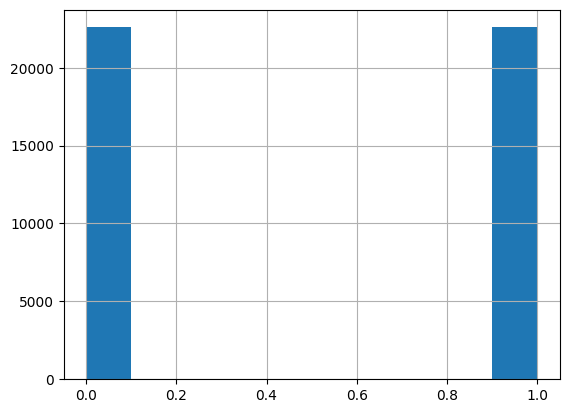

In [85]:
df2_balanced['Vulnerability_status'].hist()

In [86]:
df2_balanced.head()

,index,category,Severity,Description,Code,CWE_ID,CWE_Desc,Vulnerability_status,processed_code
0,983927,NaN,NaN,NaN,case 115813378:,NaN,NaN,0,case 115813378:
1,414231,file,INFO,Hardcoded HTTP url found,"String NS_PDFA_EXTENSION = ""http://www.aiim.or...",CWE-312,Cleartext Storage of Sensitive Information,1,"String NS_PDFA_EXTENSION = ""user_str"";"
2,1497204,file,WARNING,Insecure functions found,public void call(PlayerMovementListener player...,CWE-676,Use of Potentially Dangerous Function,1,public void call(PlayerMovementListener player...
3,859877,NaN,NaN,NaN,private int field_3301;,NaN,NaN,0,private int field_3301;
4,991663,NaN,NaN,NaN,m = new m(n);,NaN,NaN,0,m = new m(n);


In [87]:
df2_balanced.drop(['category', 'Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [88]:
df2_balanced.head(10)

,index,Vulnerability_status,processed_code
0,983927,0,case 115813378:
1,414231,1,"String NS_PDFA_EXTENSION = ""user_str"";"
2,1497204,1,public void call(PlayerMovementListener player...
3,859877,0,private int field_3301;
4,991663,0,m = new m(n);
5,1441442,1,WebView var1 = BlobViewFragment.this.getWebVie...
6,940462,1,public static String MS_JOIN_CONFERENCE = load...
7,1632158,0,var4.field_7439 = 0;
8,777837,0,"ItemTouchHelper.this.method_1024(var4, var2, v..."
9,1435996,0,switch(var0 % 10) {


In [89]:
df2_balanced.tail(10)

,index,Vulnerability_status,processed_code
45178,3089328,1,public static enum FetchSection {
45179,452190,0,if (var0 <= (long)-999500) {
45180,1874139,1,"Log.d((String)""user_str"", (String)(""user_str"" ..."
45181,574276,0,this.field_1694 = new Rect();
45182,468434,0,this.mGlobalSize = mGlobalSize;
45183,3171586,0,this.infos = Collections.synchronizedMap(new H...
45184,3220599,1,"Log.w(class_2.TAG, ""user_str"" + var11.getMessa..."
45185,2140902,1,"Log.i(app_NAME6, sb6.toString());"
45186,115959,0,var2 = (int)((float)(var1 - var6 - var7 + var3...
45187,379519,0,((EditText)this.findViewById(2131492976)).setE...


In [90]:
df2_balanced.dropna()

,index,Vulnerability_status,processed_code
0,983927,0,case 115813378:
1,414231,1,"String NS_PDFA_EXTENSION = ""user_str"";"
2,1497204,1,public void call(PlayerMovementListener player...
3,859877,0,private int field_3301;
4,991663,0,m = new m(n);
...,...,...,...
45183,3171586,0,this.infos = Collections.synchronizedMap(new H...
45184,3220599,1,"Log.w(class_2.TAG, ""user_str"" + var11.getMessa..."
45185,2140902,1,"Log.i(app_NAME6, sb6.toString());"
45186,115959,0,var2 = (int)((float)(var1 - var6 - var7 + var3...


In [91]:
df2_balanced = df2_balanced[['processed_code', 'Vulnerability_status']]

In [92]:
df2_balanced.head()

,processed_code,Vulnerability_status
0,case 115813378:,0
1,"String NS_PDFA_EXTENSION = ""user_str"";",1
2,public void call(PlayerMovementListener player...,1
3,private int field_3301;,0
4,m = new m(n);,0


In [93]:
df2_balanced.columns = ['text', 'labels']

In [94]:
df2_balanced.head(5)

,text,labels
0,case 115813378:,0
1,"String NS_PDFA_EXTENSION = ""user_str"";",1
2,public void call(PlayerMovementListener player...,1
3,private int field_3301;,0
4,m = new m(n);,0


In [95]:
df2_balanced.head(5)

,text,labels
0,case 115813378:,0
1,"String NS_PDFA_EXTENSION = ""user_str"";",1
2,public void call(PlayerMovementListener player...,1
3,private int field_3301;,0
4,m = new m(n);,0


In [96]:
df2_balanced.to_csv('processed_dataset.csv', index=False)

In [97]:
!pip install datasets

In [98]:
from datasets import load_dataset

In [99]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [100]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 45188
    })
})

In [101]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [102]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 36150
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 9038
    })
})

In [103]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/graphcodebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [104]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [105]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [106]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/36150 [00:00<?, ? examples/s]

Map:   0%|          | 0/9038 [00:00<?, ? examples/s]

In [107]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [108]:
!pip install torchinfo

In [109]:
from torchinfo import summary

In [110]:
summary(model)

Layer (type:depth-idx)                                       Param #
RobertaForSequenceClassification                             --
├─RobertaModel: 1-1                                          --
│    └─RobertaEmbeddings: 2-1                                --
│    │    └─Embedding: 3-1                                   38,603,520
│    │    └─Embedding: 3-2                                   394,752
│    │    └─Embedding: 3-3                                   768
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─RobertaEncoder: 2-2                                   --
│    │    └─ModuleList: 3-6                                  85,054,464
├─RobertaClassificationHead: 1-2                             --
│    └─Linear: 2-3                                           590,592
│    └─Dropout: 2-4                                          --
│    └─Linear: 2-5                                           1,538
To

In [111]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [112]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'micro')
  return {'accuracy' : acc, 'f1':f1}

In [113]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

In [114]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.157300,0.148868,0.957402,0.957402
2,0.111200,0.139160,0.961385,0.961385
3,0.070400,0.142938,0.965922,0.965922
4,0.045400,0.155647,0.967249,0.967249


TrainOutput(global_step=9040, training_loss=0.1026608500728565, metrics={'train_runtime': 3602.1154, 'train_samples_per_second': 40.143, 'train_steps_per_second': 2.51, 'total_flos': 3.8045858605056e+16, 'train_loss': 0.1026608500728565, 'epoch': 4.0})